<a href="https://colab.research.google.com/github/mad940/analisis-/blob/main/gig%20cohete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Guardando GIF... (esto puede tomar unos momentos)
GIF guardado como rocket_simulation.gif


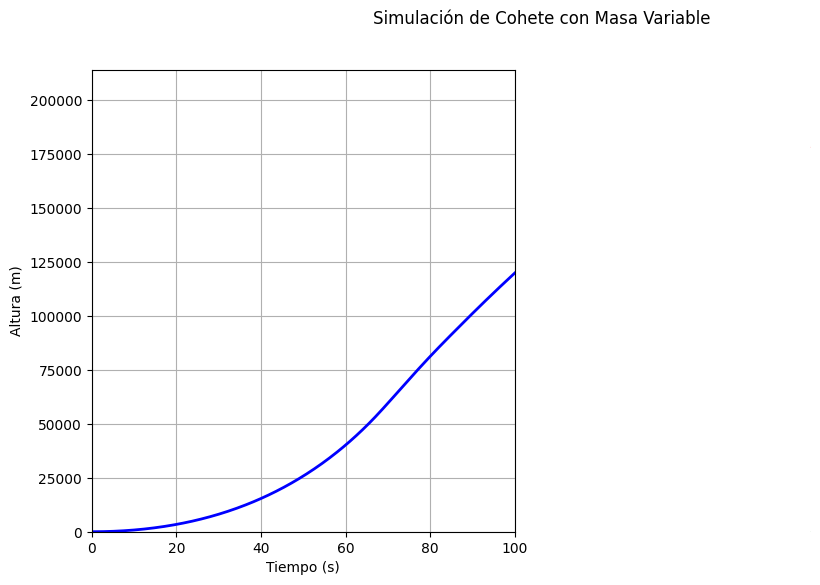

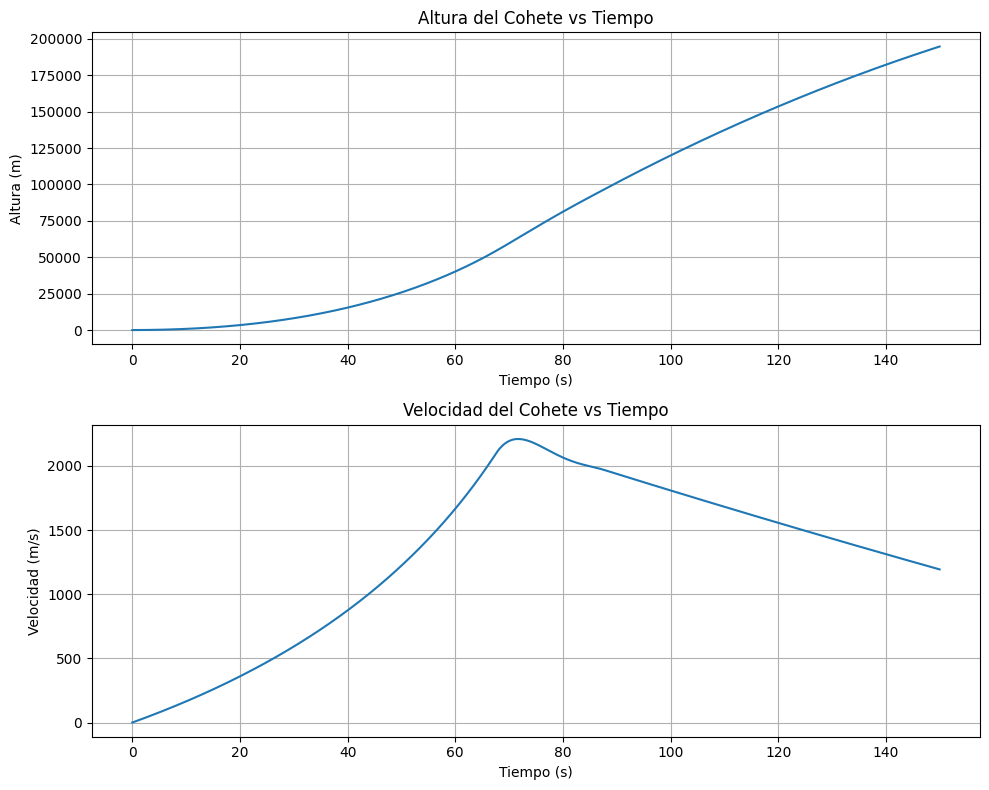


Resultados clave:
Tiempo de combustión: 70.00 s
Altura máxima alcanzada: 194702.81 m
Velocidad máxima alcanzada: 2209.57 m/s
Velocidad final: 1193.46 m/s


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle, Polygon
from scipy.integrate import solve_ivp
import imageio

# Parámetros del cohete
D = 10.0  # Tasa de consumo de combustible (kg/s)
v_exh = 2500.0  # Velocidad de escape de los gases (m/s)
m_initial = 1000.0  # Masa inicial (kg)
m_final = 300.0  # Masa final después de quemar combustible (kg)
k = 0.5  # Coeficiente de rozamiento del aire (kg/s)
g = 9.81  # Aceleración gravitacional (m/s²)

# Tiempo de combustión
burn_time = (m_initial - m_final) / D  # ~70 segundos
total_time = 150.0  # Tiempo total de simulación (s)

# Función para calcular la masa en función del tiempo
def mass(t):
    return np.where(t < burn_time, m_initial - D*t, m_final)

# Ecuación diferencial del movimiento
def rocket_motion(t, y):
    v, h = y  # y[0] = velocidad, y[1] = altura

    # Calcular masa actual
    m = mass(t)

    # Calcular empuje (solo durante la combustión)
    thrust = v_exh * D if t < burn_time else 0.0

    # Fuerza neta: empuje - gravedad - rozamiento
    dvdt = (thrust - m*g - k*v) / m
    dhdt = v

    return [dvdt, dhdt]

# Condiciones iniciales: velocidad=0, altura=0
y0 = [0.0, 0.0]

# Resolver la ecuación diferencial
t_eval = np.linspace(0, total_time, 500)
sol = solve_ivp(rocket_motion, [0, total_time], y0, t_eval=t_eval, method='RK45')

# Extraer resultados
times = sol.t
velocities = sol.y[0]
heights = sol.y[1]

# Crear figura para la animación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Simulación de Cohete con Masa Variable')

# Configurar el eje de altura
ax1.set_xlim(0, 100)
ax1.set_ylim(0, max(heights)*1.1)
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel('Altura (m)')
ax1.grid(True)

# Configurar el eje de la animación del cohete
ax2.set_xlim(-50, 50)
ax2.set_ylim(0, max(heights)*1.1)
ax2.set_aspect('equal')
ax2.axis('off')  # Ocultar ejes

# Dibujar el suelo
ground = Rectangle((-100, -10), 200, 10, color='green', alpha=0.5)
ax2.add_patch(ground)

# Crear elementos del cohete
rocket_body = Rectangle((-5, 0), 10, 20, color='gray')
rocket_nose = Polygon([[-5, 20], [5, 20], [0, 30]], color='red')
flame = Polygon([[-3, -5], [3, -5], [0, -15]], color='orange')

# Añadir elementos al eje
ax2.add_patch(rocket_body)
ax2.add_patch(rocket_nose)
flame_patch = ax2.add_patch(flame)

# Inicializar línea de altura vs tiempo
line, = ax1.plot([], [], 'b-', lw=2)
time_marker, = ax1.plot([], [], 'ro')

# Función de inicialización
def init():
    line.set_data([], [])
    time_marker.set_data([], [])
    return line, time_marker, rocket_body, rocket_nose, flame_patch

# Función de animación
def animate(i):
    # Actualizar gráfico de altura vs tiempo
    line.set_data(times[:i+1], heights[:i+1]) # Include current frame data for line
    # Update position of the time marker - pass as sequences
    time_marker.set_data([times[i]], [heights[i]])

    # Actualizar posición del cohete
    current_height = heights[i]
    rocket_body.set_xy((-5, current_height))
    # Update rocket nose polygon vertices relative to current height
    rocket_nose.set_xy([[-5, current_height+20], [5, current_height+20], [0, current_height+30]])

    # Mostrar llama solo durante la combustión
    if times[i] < burn_time:
        # Update flame polygon vertices relative to current height
        flame.set_xy([[-3, current_height-5], [3, current_height-5], [0, current_height-15]])
        flame_patch.set_visible(True)
    else:
        flame_patch.set_visible(False)

    # Ajustar límites del eje si el cohete sube mucho
    if current_height > ax2.get_ylim()[1]*0.8:
        ax2.set_ylim(0, current_height*1.2)

    return line, time_marker, rocket_body, rocket_nose, flame_patch

# Crear animación
frames = len(times)
anim = FuncAnimation(fig, animate, frames=frames, init_func=init,
                     blit=True, interval=50, repeat=False)

# Guardar como GIF
print("Guardando GIF... (esto puede tomar unos momentos)")
gif_filename = "rocket_simulation.gif"

# Ensure pillow writer is available
try:
    from matplotlib.animation import PillowWriter
    writer = PillowWriter(fps=20)
except ImportError:
    print("Pillow not found. Please install it using: !pip install Pillow")
    print("Cannot save GIF without Pillow.")
    writer = None # Set writer to None if not available

if writer:
    anim.save(gif_filename, writer=writer)

print(f"GIF guardado como {gif_filename}")

# Mostrar gráficos adicionales
plt.figure(figsize=(10, 8))

# Gráfico de altura vs tiempo
plt.subplot(2, 1, 1)
plt.plot(times, heights)
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)')
plt.title('Altura del Cohete vs Tiempo')
plt.grid(True)

# Gráfico de velocidad vs tiempo
plt.subplot(2, 1, 2)
plt.plot(times, velocities)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad del Cohete vs Tiempo')
plt.grid(True)

plt.tight_layout()
plt.show()

# Mostrar algunos resultados
print("\nResultados clave:")
print(f"Tiempo de combustión: {burn_time:.2f} s")
print(f"Altura máxima alcanzada: {max(heights):.2f} m")
print(f"Velocidad máxima alcanzada: {max(velocities):.2f} m/s")
print(f"Velocidad final: {velocities[-1]:.2f} m/s")